In [1]:
import pandas as pd
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer

- O ideal é executar o ambiente com o Conda
- Estou tentando resolver o problema do vscode no Linux (wsl)

In [4]:
df = pd.read_csv('data/uber_data.csv', sep=";")

In [5]:
df

,id,comment,sentiment
0,1,"That, my friend, is why The Mighty Swift Ra...",0
1,2,Spent 20 minutes in an Uber listening to what ...,0
2,3,"via The Guardian Guardian front page, Monday ...",-1
3,4,My real job is being my girlfriends personal U...,0
4,5,i had a bad drive . i want my refund,-1
...,...,...,...
2871,3519,"Top story: Uber broke laws, duped police and s...",-1
2872,3521,"Top story: Uber broke laws, duped police and s...",-1
2873,3522,"Top story: Uber broke laws, duped police and s...",-1
2874,3523,reading about this uber leak reminded me how f...,-1


# Primeiro modelo aplicado aos dados do projeto:

In [16]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(df['comment'])

In [17]:
print(bag_of_words.shape)

(2876, 50)


In [20]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, df['sentiment'], random_state = 42)

In [22]:
print(treino.shape)
print(teste.shape)

(2157, 50)
(719, 50)


In [23]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(treino, classe_treino)
previsao_teste = logisticRegression.predict_proba(teste)
print(previsao_teste)

[[9.94176305e-01 1.92625954e-03 3.89743527e-03]
 [3.89703656e-01 5.48627168e-01 6.16691754e-02]
 [9.52144176e-01 4.07574527e-02 7.09837082e-03]
 ...
 [3.66085205e-01 3.16182142e-01 3.17732653e-01]
 [9.94556262e-01 5.23335184e-03 2.10385804e-04]
 [8.79971822e-01 1.05098716e-01 1.49294627e-02]]


In [24]:
previsao_teste_bol = previsao_teste[:,1] >= 0.5
print(previsao_teste_bol)

[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False  True False False False  True False False False
 False False False False False False False False  True False False False
 False False False False False False False False False  True  True False
 False False False False False False False False False False False False
 False False False False False False  True False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False Fa

In [25]:
previsao_teste_int = previsao_teste_bol.astype(int)
print(previsao_teste_int)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 

In [26]:
from sklearn.metrics import accuracy_score

acuracia_teste = accuracy_score(classe_teste, previsao_teste_int)
print(acuracia_teste)

0.18915159944367177


# Visualização dos dados com WordCloud

In [29]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


In [30]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in df['comment']])

In [32]:
nuvem_palavras = WordCloud(width = 800, height= 500, max_font_size=110, collocations=False).generate(todas_palavras)

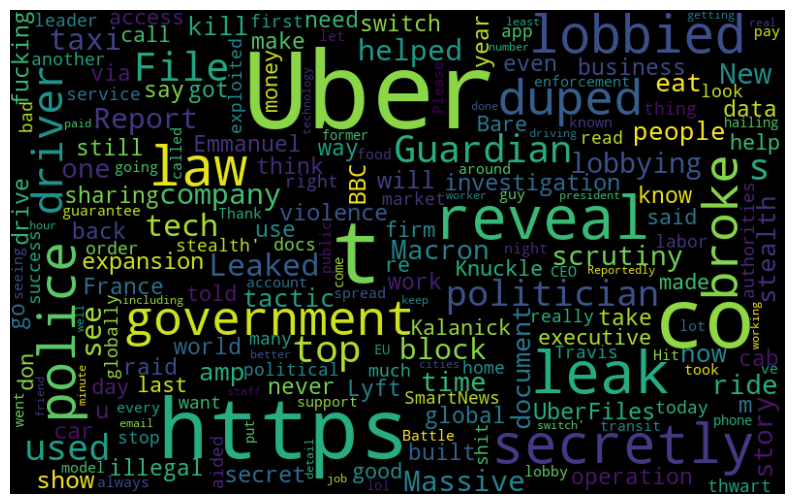

In [33]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## Palavras 'Positivas'

In [34]:
positive = df.query("sentiment == 1")

In [35]:
positive.head()

,id,comment,sentiment
30,33,"Yeah, I think we need to distinguish betwee...",1
74,85,We love telling ppl our Uber love story,1
132,154,Uber driver playing ?She Hates Me? by Puddle o...,1
149,173,The winner!,1
195,221,Love Uber,1


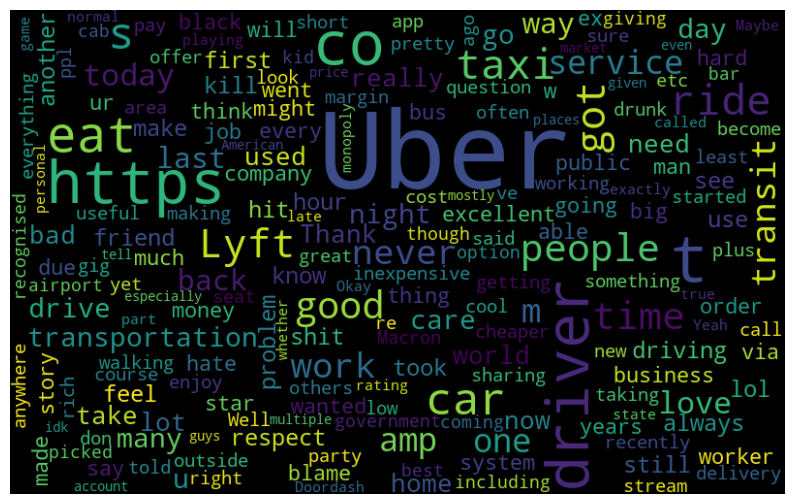

In [36]:
positive_words = ' '.join([texto for texto in positive['comment']])
nuvem_palavras_positivas = WordCloud(width = 800, height= 500, max_font_size=110, collocations=False).generate(positive_words)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras_positivas, interpolation='bilinear')
plt.axis('off')
plt.show()

## Palavras Negativas

In [37]:
negative = df.query("sentiment == 0")

In [42]:
negative

,id,comment,sentiment
0,1,"That, my friend, is why The Mighty Swift Ra...",0
1,2,Spent 20 minutes in an Uber listening to what ...,0
3,4,My real job is being my girlfriends personal U...,0
18,20,Currently Trending in Belgium ???? Sun Jul 10 ...,0
19,21,The Uber campaign: how ex-Obama aides helped s...,0
...,...,...,...
2817,3165,on the way to the airport my uber driver was t...,0
2818,3166,at the bar. The uber driver takes it from th...,0
2821,3169,Why tf Keyshawn didn?t get a uber,0
2824,3174,It?s too hot outside so I brought a cup of ice...,0


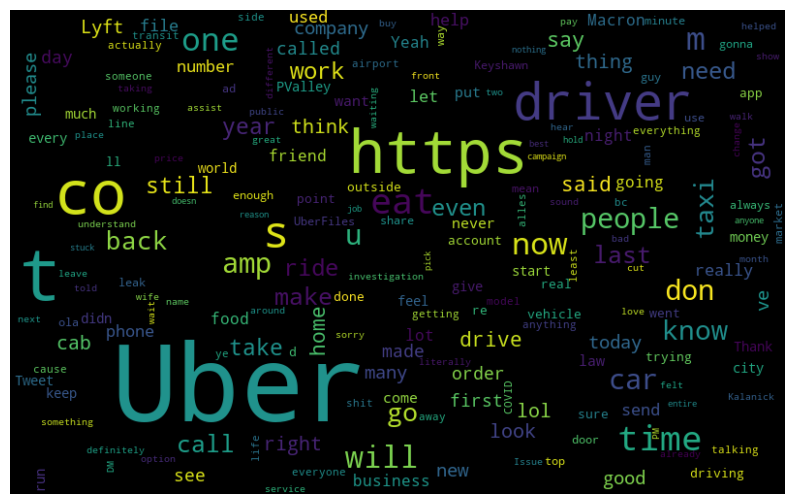

In [43]:
negative_words = ' '.join([texto for texto in negative['comment']])
nuvem_palavras_negativas = WordCloud(width = 800, height= 500, max_font_size=110, collocations=False).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras_negativas, interpolation='bilinear')
plt.axis('off')
plt.show()

# Tokenização com NLTK para criar uma nova visualização.

In [44]:
!pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/b3/d0/1a054b685849b018cff594ccd4859fc6a3132f67698da805ed06d5b6974a/regex-2024.4.16-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------  41.0/42.0 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 675.1 kB/s eta 0:00:00
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/2a/14/e75e52d521442e2fcc9f1df3c5e456aead034203d4797867980de558ab34/tqdm-4

In [47]:
import nltk

todas_palavras = ' '.join([text for text in df['comment']])
token_espaco = nltk.tokenize.WhitespaceTokenizer()
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), 
                              "Frequência": list(frequencia.values())})

In [48]:
df_frequencia.head()

,Palavra,Frequência
0,"That,",1
1,my,256
2,"friend,",1
3,is,425
4,why,36


In [49]:
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)

In [50]:
df_frequencia

,Palavra,Frequência
19,Uber,2391
21,to,1514
50,the,1507
79,and,1429
65,a,838
10,of,671
83,leak,661
80,secretly,643
17,in,615
45,reveals,605


In [52]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------------------------ --------- 225.3/294.9 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00


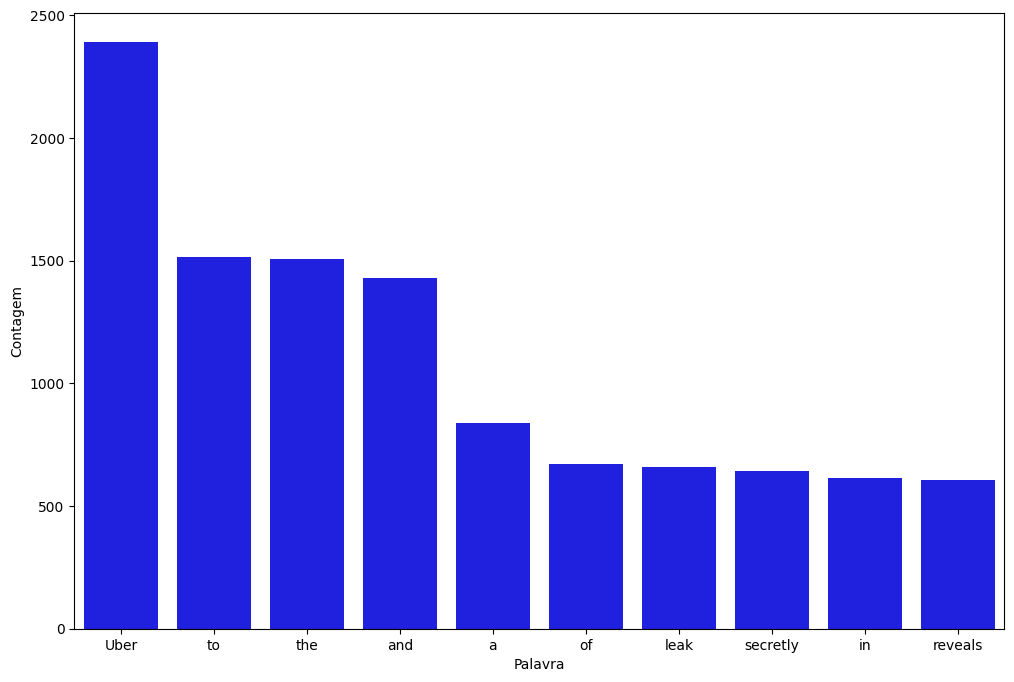

In [53]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_frequencia, x= "Palavra", y = "Frequência", color = 'blue')
ax.set(ylabel = "Contagem")
plt.show()

# Criando funções para um pipeline de otimização

In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [58]:
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [59]:
phase_processing = list()

for comment in df['comment']:
    new_comment = list()
    word_text = token_espaco.tokenize(comment)
    for word in word_text:
        if word not in stopwords:
            new_comment.append(word)
    phase_processing.append(' '.join(new_comment))

df['processing_1'] = phase_processing

In [62]:
print(df['processing_1'][0]+'\n')
print(df['comment'][0])

That, friend, The Mighty Swift Radio Cars Stalybridge retain costume.

   That, my friend, is why The Mighty Swift Radio Cars of Stalybridge retain my costume.


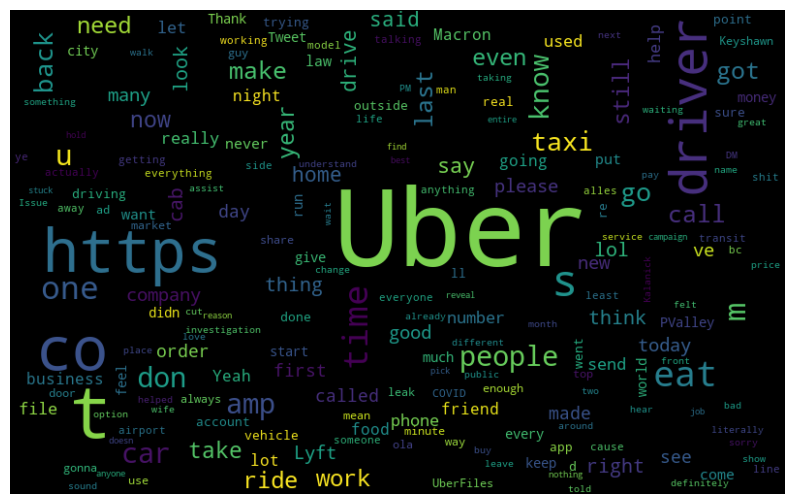

In [64]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 0")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

nuvem_palavras_neg(df, 'processing_1')

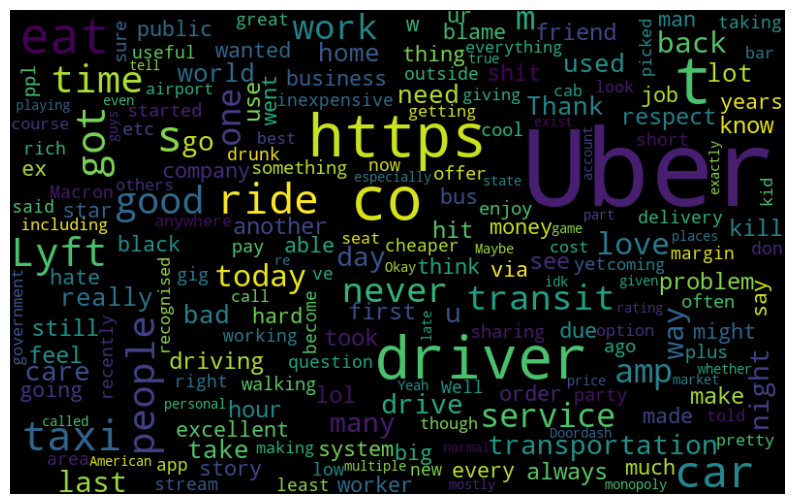

In [66]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = df.query("sentiment == 1")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
nuvem_palavras_pos(df, "processing_1")   

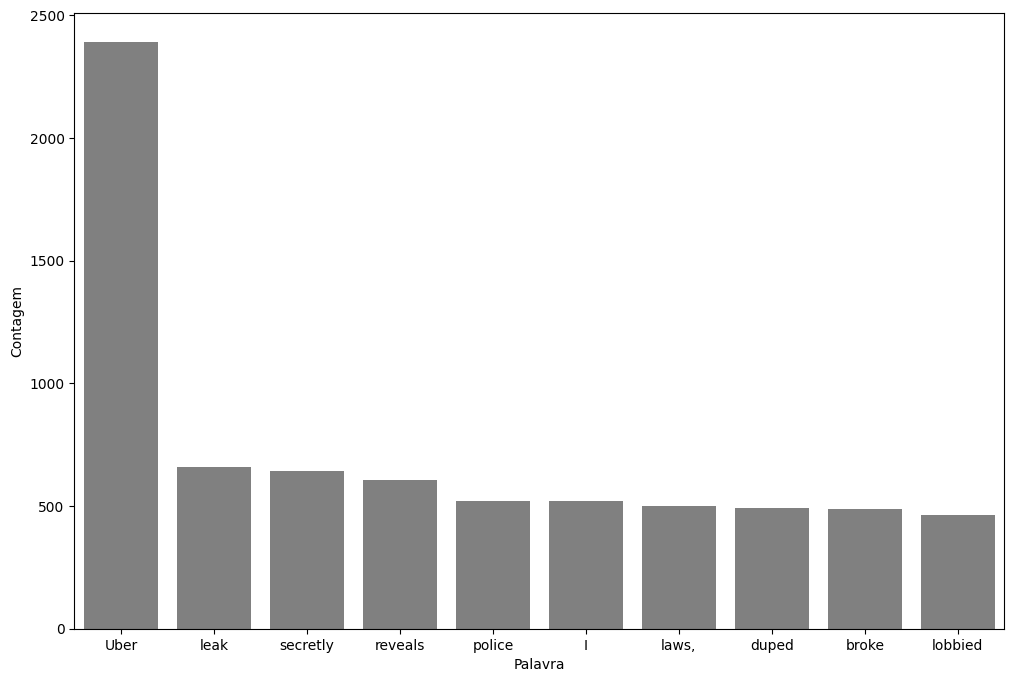

In [67]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

pareto(df, "processing_1", 10)

In [71]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                 texto[coluna_classificacao],
                                                                 random_state = 42)
    
    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    
    return regressao_logistica.score(teste, classe_teste)

acuracia_teste = classificar_texto(df, "processing_1", "sentiment")
print(f"{acuracia_teste*100}%")

70.09735744089014%


- Fazer uma validação Cruzada para conferir o resultado
- shuffle: bool = True, stratify: ArrayLike -> usar os dados embaralhados para treinar o modelo